In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
from pylab import figure, axes, pie, title, savefig
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/hamin/bithumb_bot_data/include/2018/2018-04-btc-krw.csv")

In [3]:
df.dtypes # identifying column type

timestamp     object
quantity     float64
price          int64
fee            int64
amount         int64
side           int64
dtype: object

In [4]:
## converting timestamp column type 'object' to 'datetime'
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='raise')
df.dtypes

timestamp    datetime64[ns]
quantity            float64
price                 int64
fee                   int64
amount                int64
side                  int64
dtype: object

In [5]:
## converting timestamp to detailed date column
df['timestamp_year_month_day'] = df['timestamp'].dt.date         # YYYY-MM-DD(문자)
df['timestamp_year'] = df['timestamp'].dt.year         # 연(4자리숫자)
df['timestamp_month'] = df['timestamp'].dt.month        # 월(숫자)
df['timestamp_month_name'] = df['timestamp'].dt.month_name() # 월(문자)

df['timestamp_day'] = df['timestamp'].dt.day          # 일(숫자)
df['timestamp_time'] = df['timestamp'].dt.time         # HH:MM:SS(문자)
df['timestamp_hour'] = df['timestamp'].dt.hour         # 시(숫자)
df['timestamp_minute'] = df['timestamp'].dt.minute       # 분(숫자)
df['timestamp_second'] = df['timestamp'].dt.second       # 초(숫자)

In [6]:
## creating 'hour - amount' connection
group_hour_amount = df['amount'].groupby(df['timestamp_hour'])

In [7]:
## 시간별 transaction 수
group_hour_amount.size()

timestamp_hour
0     1132
1      971
2      775
3      538
4      556
5      648
6      852
7     1172
8     1422
9     1588
10    1330
11    1245
12    1103
13    1209
14    1062
15    1261
16    1215
17    1352
18    1421
19    1531
20    1500
21    1404
22    1283
23    1220
Name: amount, dtype: int64

In [8]:
## 시간별 총 sell - buy
group_hour_amount.sum()

timestamp_hour
0     114868467
1     -48371554
2     -11984907
3      74536778
4      18869286
5     -61174958
6     -37904077
7      59291693
8      41550852
9       -207970
10     -3871976
11    -32415214
12     23511052
13     26753047
14    -19628833
15     59748522
16    -18546364
17    -76477308
18    -61489803
19     52505373
20     43765002
21     67480864
22   -188290383
23      3158451
Name: amount, dtype: int64

In [9]:
## creating 'hourly - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_hour_amount_positive = df2['amount'].groupby(df2['timestamp_hour'])

In [10]:
# 시간별 sell transaction 수 (positive)
group_hour_amount_positive.size()

timestamp_hour
0     630
1     560
2     443
3     317
4     308
5     382
6     509
7     729
8     827
9     886
10    799
11    678
12    661
13    671
14    679
15    767
16    713
17    811
18    790
19    861
20    892
21    845
22    703
23    777
Name: amount, dtype: int64

In [11]:
# 시간별 sell 총합
group_hour_amount_positive.sum()

timestamp_hour
0     1951036049
1     1437902367
2     1199318401
3      763277352
4      710558153
5      861073134
6     1228580613
7     1837178235
8     2269378269
9     2704894220
10    2376954896
11    1918210080
12    1954669736
13    1996956974
14    1902392422
15    2051723861
16    2073693055
17    2255552717
18    2089569717
19    2691776632
20    2573733574
21    2655265251
22    2137460524
23    1994403993
Name: amount, dtype: int64

In [12]:
## creating 'hour - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_hour_amount_negative = df3['amount'].groupby(df3['timestamp_hour'])

In [13]:
# 시간별 buy transaction 수
group_hour_amount_negative.size()

timestamp_hour
0     502
1     411
2     332
3     221
4     248
5     266
6     343
7     443
8     595
9     702
10    531
11    567
12    442
13    538
14    383
15    494
16    502
17    541
18    631
19    670
20    608
21    559
22    580
23    443
Name: amount, dtype: int64

In [14]:
# 시간별 buy 총합
group_hour_amount_negative.sum()

timestamp_hour
0    -1836167582
1    -1486273921
2    -1211303308
3     -688740574
4     -691688867
5     -922248092
6    -1266484690
7    -1777886542
8    -2227827417
9    -2705102190
10   -2380826872
11   -1950625294
12   -1931158684
13   -1970203927
14   -1922021255
15   -1991975339
16   -2092239419
17   -2332030025
18   -2151059520
19   -2639271259
20   -2529968572
21   -2587784387
22   -2325750907
23   -1991245542
Name: amount, dtype: int64

In [15]:
# 시간별 절대값 총합
# negative는 buy
absolute_negative_sum = group_hour_amount_negative.sum()
absolute_negative_sum = absolute_negative_sum * (-1)
# total 은 sell - buy
absolute_total_amount = absolute_negative_sum+group_hour_amount_positive.sum()
absolute_total_amount

timestamp_hour
0     3787203631
1     2924176288
2     2410621709
3     1452017926
4     1402247020
5     1783321226
6     2495065303
7     3615064777
8     4497205686
9     5409996410
10    4757781768
11    3868835374
12    3885828420
13    3967160901
14    3824413677
15    4043699200
16    4165932474
17    4587582742
18    4240629237
19    5331047891
20    5103702146
21    5243049638
22    4463211431
23    3985649535
Name: amount, dtype: int64

In [16]:
## 시간별 계산 table 생성
dfs = [group_hour_amount.size(), group_hour_amount.sum(), group_hour_amount_positive.size(), group_hour_amount_positive.sum(), group_hour_amount_negative.size(), group_hour_amount_negative.sum(), absolute_total_amount, absolute_negative_sum]
day_df_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_hour'), dfs)
day_df_final.columns = [ "Hourly transaction", "Hourly sell-buy", "Hourly sell transaction", "Hourly sell", "Hourly buy transaction", "Hourly buy", "Hourly total sell", "Hourly absolute total buy"]
day_df_final

,Hourly transaction,Hourly sell-buy,Hourly sell transaction,Hourly sell,Hourly buy transaction,Hourly buy,Hourly total sell,Hourly absolute total buy
timestamp_hour,,,,,,,,
0,1132,114868467,630,1951036049,502,-1836167582,3787203631,1836167582
1,971,-48371554,560,1437902367,411,-1486273921,2924176288,1486273921
2,775,-11984907,443,1199318401,332,-1211303308,2410621709,1211303308
3,538,74536778,317,763277352,221,-688740574,1452017926,688740574
4,556,18869286,308,710558153,248,-691688867,1402247020,691688867
5,648,-61174958,382,861073134,266,-922248092,1783321226,922248092
6,852,-37904077,509,1228580613,343,-1266484690,2495065303,1266484690
7,1172,59291693,729,1837178235,443,-1777886542,3615064777,1777886542
8,1422,41550852,827,2269378269,595,-2227827417,4497205686,2227827417


In [17]:
day_df_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/hour_result_table_2018_04.csv", header=True, index=True, encoding = 'utf-8')

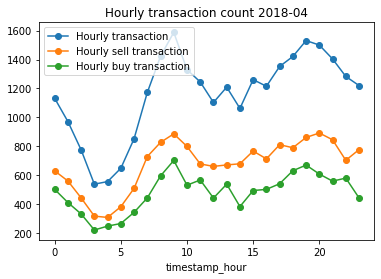

In [18]:
day_df_final[['Hourly transaction', 'Hourly sell transaction', 'Hourly buy transaction']].plot(title='Hourly transaction count 2018-04', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count_2018_04.png', dpi=300)

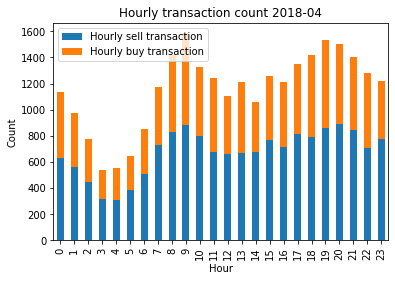

In [19]:
hourTransGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count 2018-04', stacked=True)
hourTransGraph.set_xlabel('Hour')
hourTransGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Stacked)_2018_04.png', dpi=300)

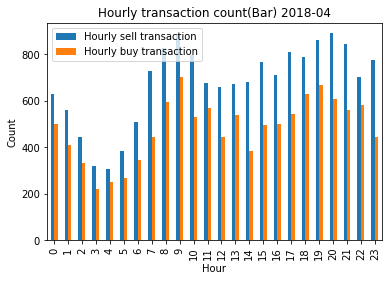

In [20]:
hourTransBarGraph = day_df_final[['Hourly sell transaction', 'Hourly buy transaction']].plot.bar(title='Hourly transaction count(Bar) 2018-04')
hourTransBarGraph.set_xlabel('Hour')
hourTransBarGraph.set_ylabel('Count')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Hourly transaction count(Bar)_2018_04.png', dpi=300)

In [21]:
# Minute
## creating 'minute - amount' connection
group_minute_amount = df['amount'].groupby(df['timestamp_minute'])

In [22]:
# Date
# Creating 'date - amount' connection
group_date_amount = df['amount'].groupby(df['timestamp_day'])

In [23]:
# 분 당 transaction 수
group_minute_amount.size()

timestamp_minute
0     626
1     480
2     532
3     488
4     447
5     428
6     463
7     480
8     537
9     457
10    440
11    450
12    461
13    451
14    381
15    472
16    433
17    495
18    472
19    373
20    484
21    511
22    494
23    497
24    447
25    495
26    442
27    427
28    423
29    457
30    447
31    451
32    438
33    425
34    384
35    468
36    516
37    503
38    474
39    426
40    424
41    426
42    479
43    511
44    418
45    500
46    491
47    433
48    439
49    393
50    499
51    433
52    483
53    508
54    447
55    431
56    457
57    525
58    429
59    489
Name: amount, dtype: int64

In [24]:
# date 당 transaction 수
group_date_amount.size()

timestamp_day
1      574
2      659
3      810
4     1210
5     1108
6      756
7      538
8      723
9     1342
10     952
11     773
12    1600
13    1387
14     678
15     603
16     723
17     643
18     777
19     791
20    1160
21    1243
22     727
23     764
24     930
25    1526
26    1329
27    1031
28    1062
29     720
30     651
Name: amount, dtype: int64

In [25]:
# minute 별 sell - buy 금액
group_minute_amount.sum()

timestamp_minute
0     150997882
1     -26787129
2      88439878
3     214467915
4     -18155899
5    -110333635
6    -243135184
7     207018323
8      67769838
9     117661349
10    -61254585
11      8789631
12   -174335005
13     34865831
14     30170159
15    -40916159
16     90880986
17     30753937
18   -337510080
19     23065562
20   -176086419
21     32986251
22    210692826
23    111970292
24     20349531
25   -114109825
26    116580031
27    -86116923
28     18181520
29   -200669726
30     46589589
31    112661535
32    -63943533
33   -102362239
34     95948372
35    174303878
36    -23358461
37     45969943
38    122999326
39    191536708
40   -141628591
41   -154904227
42    -76384123
43     54282244
44   -100288817
45    201436992
46      4353753
47    -28029065
48     -9991125
49   -180711928
50     72249158
51    207198089
52   -169654682
53    232853568
54   -169342600
55    -57822604
56     29307943
57   -112563290
58   -102248419
59    -59012527
Name: amount, dtype: in

In [26]:
# date 별 sell - buy 금액
group_hour_amount.sum()

timestamp_hour
0     114868467
1     -48371554
2     -11984907
3      74536778
4      18869286
5     -61174958
6     -37904077
7      59291693
8      41550852
9       -207970
10     -3871976
11    -32415214
12     23511052
13     26753047
14    -19628833
15     59748522
16    -18546364
17    -76477308
18    -61489803
19     52505373
20     43765002
21     67480864
22   -188290383
23      3158451
Name: amount, dtype: int64

In [27]:
# creating 'minute' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_minute_amount_positive = df2['amount'].groupby(df2['timestamp_minute'])

In [28]:
# creating 'date' - buy amount' connection
df2 = df.copy()
df2 =df2[df2['amount'] > 0]
group_date_amount_positive = df2['amount'].groupby(df2['timestamp_day'])

In [29]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     378
1     303
2     305
3     323
4     260
5     254
6     267
7     320
8     334
9     271
10    244
11    291
12    276
13    274
14    225
15    294
16    253
17    311
18    268
19    216
20    279
21    278
22    317
23    306
24    247
25    256
26    283
27    269
28    226
29    266
30    257
31    286
32    251
33    252
34    243
35    281
36    294
37    294
38    287
39    253
40    210
41    202
42    247
43    260
44    222
45    285
46    283
47    237
48    240
49    199
50    287
51    269
52    259
53    331
54    253
55    264
56    278
57    299
58    235
59    286
Name: amount, dtype: int64

In [30]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1     362
2     415
3     441
4     727
5     683
6     457
7     336
8     418
9     778
10    614
11    489
12    931
13    774
14    410
15    343
16    416
17    361
18    479
19    427
20    761
21    754
22    409
23    487
24    538
25    781
26    699
27    578
28    608
29    408
30    354
Name: amount, dtype: int64

In [31]:
# minute 별 sell transaction 수 (positive)
group_minute_amount_positive.size()

timestamp_minute
0     378
1     303
2     305
3     323
4     260
5     254
6     267
7     320
8     334
9     271
10    244
11    291
12    276
13    274
14    225
15    294
16    253
17    311
18    268
19    216
20    279
21    278
22    317
23    306
24    247
25    256
26    283
27    269
28    226
29    266
30    257
31    286
32    251
33    252
34    243
35    281
36    294
37    294
38    287
39    253
40    210
41    202
42    247
43    260
44    222
45    285
46    283
47    237
48    240
49    199
50    287
51    269
52    259
53    331
54    253
55    264
56    278
57    299
58    235
59    286
Name: amount, dtype: int64

In [32]:
# date 별 sell transaction 수 (positive)
group_date_amount_positive.size()

timestamp_day
1     362
2     415
3     441
4     727
5     683
6     457
7     336
8     418
9     778
10    614
11    489
12    931
13    774
14    410
15    343
16    416
17    361
18    479
19    427
20    761
21    754
22    409
23    487
24    538
25    781
26    699
27    578
28    608
29    408
30    354
Name: amount, dtype: int64

In [33]:
# creating 'minute - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_minute_amount_negative = df3['amount'].groupby(df3['timestamp_minute'])

In [34]:
## creating 'date - buy amount' connection
df3 = df.copy()
df3 = df3[df3['amount'] < 0]
group_date_amount_negative = df3['amount'].groupby(df3['timestamp_day'])

In [35]:
# minute 별 buy transaction 수
group_minute_amount_negative.size()

timestamp_minute
0     248
1     177
2     227
3     165
4     187
5     174
6     196
7     160
8     203
9     186
10    196
11    159
12    185
13    177
14    156
15    178
16    180
17    184
18    204
19    157
20    205
21    233
22    177
23    191
24    200
25    239
26    159
27    158
28    197
29    191
30    190
31    165
32    187
33    173
34    141
35    187
36    222
37    209
38    187
39    173
40    214
41    224
42    232
43    251
44    196
45    215
46    208
47    196
48    199
49    194
50    212
51    164
52    224
53    177
54    194
55    167
56    179
57    226
58    194
59    203
Name: amount, dtype: int64

In [36]:
# date 별 buy transaction 수
group_date_amount_negative.size()

timestamp_day
1     212
2     244
3     369
4     483
5     425
6     299
7     202
8     305
9     564
10    338
11    284
12    669
13    613
14    268
15    260
16    307
17    282
18    298
19    364
20    399
21    489
22    318
23    277
24    392
25    745
26    630
27    453
28    454
29    312
30    297
Name: amount, dtype: int64

In [37]:
# minute 별 buy 총합
group_minute_amount_negative.sum()

timestamp_minute
0    -912154933
1    -827442719
2    -836492317
3    -667182915
4    -737979156
5    -736004219
6    -979568747
7    -641730268
8    -897937088
9    -783769241
10   -853313530
11   -742826053
12   -914559244
13   -790114518
14   -667392003
15   -778316220
16   -659058059
17   -817159020
18   -968989808
19   -702199135
20   -905150862
21   -803169797
22   -765311155
23   -643594485
24   -750945892
25   -824248035
26   -661117116
27   -786831484
28   -757042617
29   -768375907
30   -772127730
31   -603429379
32   -687190012
33   -741216055
34   -581422810
35   -670088928
36   -730790731
37   -810203233
38   -702381163
39   -487595785
40   -723320424
41   -849719650
42   -816631094
43   -710125410
44   -721670651
45   -750149871
46   -781305116
47   -782525049
48   -728862847
49   -802983918
50   -774099840
51   -572092634
52   -784245726
53   -733412401
54   -723525313
55   -683652470
56   -767165662
57   -905319440
58   -830541622
59   -802112678
Name: amount, dtype: in

In [38]:
# daye 별 buy 총합
group_date_amount_negative.sum()

timestamp_day
1     -789028093
2     -971912446
3    -1286060640
4    -1988094621
5    -1917061431
6     -994355354
7     -923204949
8    -1178706654
9    -2341970836
10   -1677035901
11   -1232106019
12   -2707910105
13   -2312725235
14   -1014048588
15   -1098733703
16   -1309272889
17    -952495553
18   -1141627824
19   -1451179887
20   -2021421916
21   -2290684649
22   -1138918781
23   -1531902268
24   -1546734794
25   -2302334490
26   -2047567483
27   -1882456618
28   -1540902683
29   -1011675298
30   -1007754477
Name: amount, dtype: int64

In [39]:
# minute 별 절대값 총합
# negative는 buy
absolute_minute_negative_sum = group_minute_amount_negative.sum()
absolute_minute_negative_sum = absolute_minute_negative_sum * (-1)
# total 은 sell - buy
absolute_minute_total_amount = absolute_minute_negative_sum+group_minute_amount_positive.sum()
absolute_minute_total_amount

timestamp_minute
0     1975307748
1     1628098309
2     1761424512
3     1548833745
4     1457802413
5     1361674803
6     1716002310
7     1490478859
8     1863644014
9     1685199831
10    1645372475
11    1494441737
12    1654783483
13    1615094867
14    1364954165
15    1515716281
16    1408997104
17    1665071977
18    1600469536
19    1427463832
20    1634215305
21    1639325845
22    1741315136
23    1399159262
24    1522241315
25    1534386245
26    1438814263
27    1487546045
28    1532266754
29    1336082088
30    1590845049
31    1319520293
32    1310436491
33    1380069871
34    1258793992
35    1514481734
36    1438223001
37    1666376409
38    1527761652
39    1166728278
40    1305012257
41    1544535073
42    1556878065
43    1474533064
44    1343052485
45    1701736734
46    1566963985
47    1537021033
48    1447734569
49    1425255908
50    1620448838
51    1351383357
52    1398836770
53    1699678370
54    1277708026
55    1309482336
56    1563639267
57    16980755

In [40]:
# date 별 절대값 총합
# negative는 buy
absolute_date_negative_sum = group_date_amount_negative.sum()
absolute_date_negative_sum = absolute_date_negative_sum * (-1)
# total 은 sell - buy
absolute_date_total_amount = absolute_date_negative_sum+group_date_amount_positive.sum()
absolute_date_total_amount

timestamp_day
1     1579443058
2     1922367203
3     2596054951
4     3969862612
5     3832762228
6     1998850076
7     1847749829
8     2345721646
9     4679980761
10    3366088716
11    2458650130
12    5414905338
13    4615629370
14    2031901304
15    2188201201
16    2649253097
17    1904516557
18    2284977054
19    2903250128
20    4044945575
21    4546992664
22    2300730074
23    3039713084
24    3133221639
25    4607088412
26    4090294118
27    3741074155
28    3091488833
29    2044145908
30    2015584689
Name: amount, dtype: int64

In [41]:
# minute 별 계산 table 생성
dfs = [group_minute_amount.size(), group_minute_amount.sum(), group_minute_amount_positive.size(), group_minute_amount_positive.sum(), group_minute_amount_negative.size(), group_minute_amount_negative.sum(), absolute_minute_total_amount, absolute_minute_negative_sum]
day_df_minute_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_minute'), dfs)
day_df_minute_final.columns = [ "Minute transaction", "Minute sell-buy", "Minute sell transaction", "Minute sell", "Minute buy transaction", "Minute buy", "Minute total sell", "Minute absolute total buy"]
day_df_minute_final

,Minute transaction,Minute sell-buy,Minute sell transaction,Minute sell,Minute buy transaction,Minute buy,Minute total sell,Minute absolute total buy
timestamp_minute,,,,,,,,
0,626,150997882,378,1063152815,248,-912154933,1975307748,912154933
1,480,-26787129,303,800655590,177,-827442719,1628098309,827442719
2,532,88439878,305,924932195,227,-836492317,1761424512,836492317
3,488,214467915,323,881650830,165,-667182915,1548833745,667182915
4,447,-18155899,260,719823257,187,-737979156,1457802413,737979156
5,428,-110333635,254,625670584,174,-736004219,1361674803,736004219
6,463,-243135184,267,736433563,196,-979568747,1716002310,979568747
7,480,207018323,320,848748591,160,-641730268,1490478859,641730268
8,537,67769838,334,965706926,203,-897937088,1863644014,897937088


In [42]:
# date 별 계산 table 생성
dfs = [group_date_amount.size(), group_date_amount.sum(), group_date_amount_positive.size(), group_date_amount_positive.sum(), group_date_amount_negative.size(), group_date_amount_negative.sum(), absolute_date_total_amount, absolute_date_negative_sum]
day_df_date_final = reduce(lambda left,right: pd.merge(left,right,on='timestamp_day'), dfs)
day_df_date_final.columns = [ "Date transaction", "Date sell-buy", "Date sell transaction", "Date sell", "Date buy transaction", "Date buy", "Date total sell", "Date absolute total buy"]
day_df_date_final

,Date transaction,Date sell-buy,Date sell transaction,Date sell,Date buy transaction,Date buy,Date total sell,Date absolute total buy
timestamp_day,,,,,,,,
1,574,1386872,362,790414965,212,-789028093,1579443058,789028093
2,659,-21457689,415,950454757,244,-971912446,1922367203,971912446
3,810,23933671,441,1309994311,369,-1286060640,2596054951,1286060640
4,1210,-6326630,727,1981767991,483,-1988094621,3969862612,1988094621
5,1108,-1360634,683,1915700797,425,-1917061431,3832762228,1917061431
6,756,10139368,457,1004494722,299,-994355354,1998850076,994355354
7,538,1339931,336,924544880,202,-923204949,1847749829,923204949
8,723,-11691662,418,1167014992,305,-1178706654,2345721646,1178706654
9,1342,-3960911,778,2338009925,564,-2341970836,4679980761,2341970836


In [43]:
# table 저장하기
day_df_minute_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/minute_result_table_2018_04.csv", header=True, index=True, encoding = 'utf-8')

In [44]:
# table 저장하기
day_df_date_final.to_csv("/Users/hamin/ITE3035_Python/Data_Science/table/date_result_table_2018_04.csv", header=True, index=True, encoding = 'utf-8')

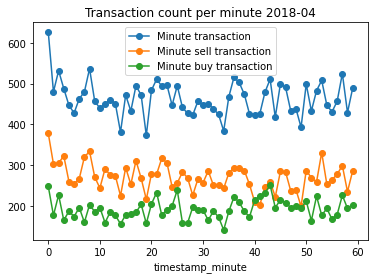

In [45]:
# Minute - transaction 그래프 그리기
day_df_minute_final[['Minute transaction', 'Minute sell transaction', 'Minute buy transaction']].plot(title='Transaction count per minute 2018-04', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute_2018_04.png', dpi=300)

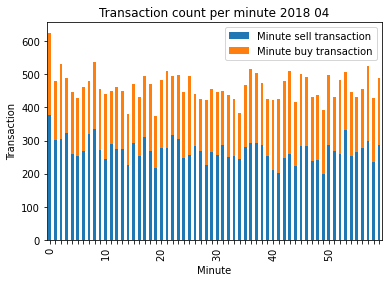

In [46]:
minuteTransGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute 2018 04', stacked=True)
minuteTransGraph.set_xlabel('Minute')
minuteTransGraph.set_ylabel('Transaction')
minuteTransGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Stacked)_2018_04.png', dpi=300)

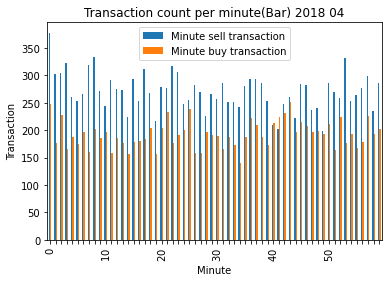

In [47]:
minuteTransBarGraph = day_df_minute_final[['Minute sell transaction', 'Minute buy transaction']].plot.bar(title='Transaction count per minute(Bar) 2018 04')
minuteTransBarGraph.set_xlabel('Minute')
minuteTransBarGraph.set_ylabel('Transaction')
minuteTransBarGraph.set_xticklabels(['$0$','','','','','','','','','','$10$','','','','','','','','','','$20$','','','','','','','','','','$30$','','','','','','','','','','$40$','','','','','','','','','','$50$'])
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_minute(Bar)_2018_04.png', dpi=300)

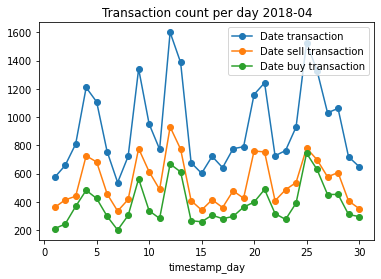

In [48]:
# Date - transaction 그래프 그리기
day_df_date_final[['Date transaction', 'Date sell transaction', 'Date buy transaction']].plot(title='Transaction count per day 2018-04', marker='o')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day_2018_04.png', dpi=300)

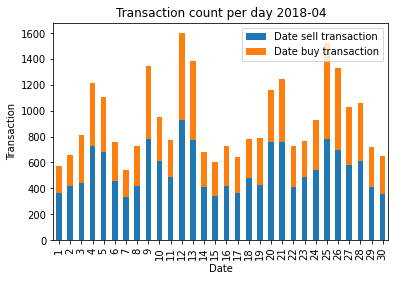

In [49]:
dayTransGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day 2018-04', stacked=True)
dayTransGraph.set_xlabel('Date')
dayTransGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Stacked)_2018_04.png', dpi=300)

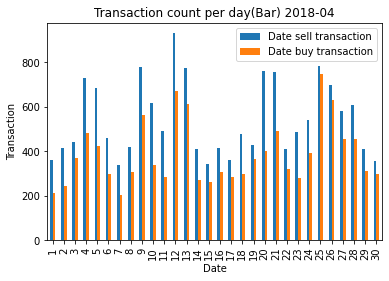

In [50]:
dayTransBarGraph = day_df_date_final[['Date sell transaction', 'Date buy transaction']].plot.bar(title='Transaction count per day(Bar) 2018-04')
dayTransBarGraph.set_xlabel('Date')
dayTransBarGraph.set_ylabel('Transaction')
plt.savefig('/Users/hamin/ITE3035_Python/Data_Science/graph/Transaction_count_per_day(Bar)_2018_04.png', dpi=300)